# Import des données

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lire le fichier Excel
df = pd.read_excel('https://ciqual.anses.fr/cms/sites/default/files/inline-files/Table%20Ciqual%202020_FR_2020%2007%2007.xls')
nombre_de_lignes = df.shape[0]

# Sélection des variables : noms, calories, sucres, fibres alimentaires, protéines, gludices, lipides
df = df.loc[:,["alim_grp_nom_fr","alim_ssgrp_nom_fr","alim_ssssgrp_nom_fr","alim_nom_fr","Energie, Règlement UE N° 1169/2011 (kcal/100 g)","Sucres (g/100 g)","Fibres alimentaires (g/100 g)","Protéines, N x 6.25 (g/100 g)","Glucides (g/100 g)","Lipides (g/100 g)"]]

# Renommer les variables
df = df.rename(columns={'alim_grp_nom_fr': 'Groupe', 'alim_ssgrp_nom_fr':'Sous-groupe', 'alim_ssssgrp_nom_fr':'Sous-sous-groupe', 'alim_nom_fr':'Nom', 'Energie, Règlement UE N° 1169/2011 (kcal/100 g)': 'Calories', 'Sucres (g/100 g)' : 'Sucres', 'Fibres alimentaires (g/100 g)' : 'Fibres', 'Protéines, N x 6.25 (g/100 g)' : 'Protéines', 'Glucides (g/100 g)' : 'Glucides', 'Lipides (g/100 g)' : 'Lipides'})

# Noms des Groupes et Sous-groupes en majuscule
df['Groupe'] = df['Groupe'].str.title()
df['Sous-groupe'] = df['Sous-groupe'].str.title()

# Elimination des plats composés
df = df[~df["Groupe"].isin(['Entrées Et Plats Composés','Glaces Et Sorbets','Aliments Infantiles'])]

# Supression des valeurs manquantes
df_svm = df.replace(to_replace=r'^<.*', value=np.nan, regex=True)
df_svm = df_svm.dropna()
for i in range(6):
    df_svm = df_svm[df_svm.iloc[:,i+4] != '-']
    df_svm = df_svm[df_svm.iloc[:,i+4] != 'traces']
nombre_de_lignes_svm = df_svm.shape[0]

# Conversion en numéique 
for i in range(6):
    df_svm.iloc[:,i+4] = pd.to_numeric(df_svm.iloc[:,i+4].str.replace(',', '.', regex=False))

# Nombre de lignes/d'ingrédients
print("Nombre de lignes avec valeurs manquantes :", nombre_de_lignes, "\nEt sans valeurs manquantes :",nombre_de_lignes_svm)

# Premières lignes du dataframe
print(df_svm.head())

Nombre de lignes avec valeurs manquantes : 3186 
Et sans valeurs manquantes : 1141
                                          Groupe Sous-groupe Sous-sous-groupe  \
338  Fruits, Légumes, Légumineuses Et Oléagineux     Légumes     légumes crus   
341  Fruits, Légumes, Légumineuses Et Oléagineux     Légumes     légumes crus   
344  Fruits, Légumes, Légumineuses Et Oléagineux     Légumes     légumes crus   
345  Fruits, Légumes, Légumineuses Et Oléagineux     Légumes     légumes crus   
346  Fruits, Légumes, Légumineuses Et Oléagineux     Légumes     légumes crus   

                                Nom Calories Sucres Fibres Protéines Glucides  \
338              Avocat, pulpe, cru    205.0    0.4    3.6      1.56     0.83   
341      Champignon, tout type, cru     21.7   1.43   1.72      2.37     1.88   
344                 Chou-fleur, cru     26.2    1.7    2.2      1.81     2.13   
345   Concombre, pulpe et peau, cru     15.6   1.67    0.6      0.64     2.54   
346  Courgette, pulpe et 

# Statistiques descriptives

Répartition des ingrédients par groupe :

                                        Groupe  Nombre  Pourcentage
0         Viandes, Œufs, Poissons Et Assimilés     381         33.4
1                      Eaux Et Autres Boissons     153         13.4
2  Fruits, Légumes, Légumineuses Et Oléagineux     152         13.3
3                          Produits Céréaliers     116         10.2
4                              Produits Sucrés     110          9.6
5       Aides Culinaires Et Ingrédients Divers      87          7.6
6               Produits Laitiers Et Assimilés      84          7.4
7                             Matières Grasses      58          5.1


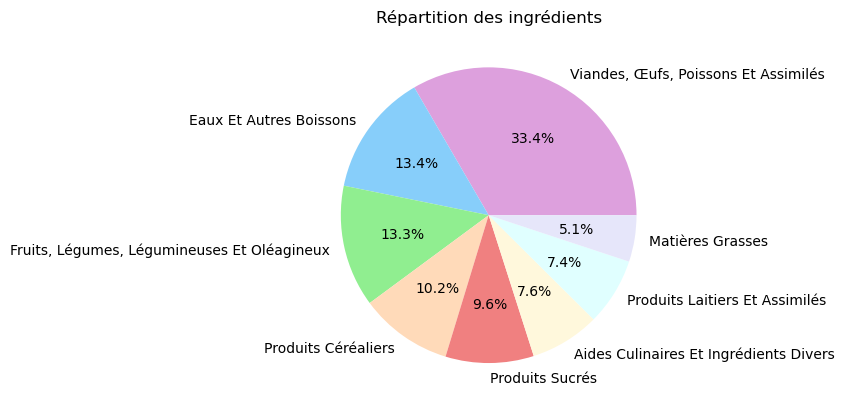

In [5]:
# Tableau
counts = df_svm['Groupe'].str.title().value_counts()
df_counts = counts.reset_index()
df_counts.columns = ['Groupe', 'Nombre']
df_counts['Pourcentage'] = round(100 * (df_counts['Nombre'] / df_counts['Nombre'].sum()),1)
print(df_counts)

# Diagramme circulaire
counts.plot(kind='pie', autopct='%1.1f%%', colors=['plum', 'lightskyblue', 'lightgreen','peachpuff','lightcoral','cornsilk','lightcyan','lavender','pink','lightgrey'] )
plt.title("Répartition des ingrédients")
plt.ylabel('')  # Cache l'étiquette de l'axe Y
plt.show()

Plus précisément, en ce qui concerne le groupe *Viandes, Œufs, Poissons et Assimilés* :

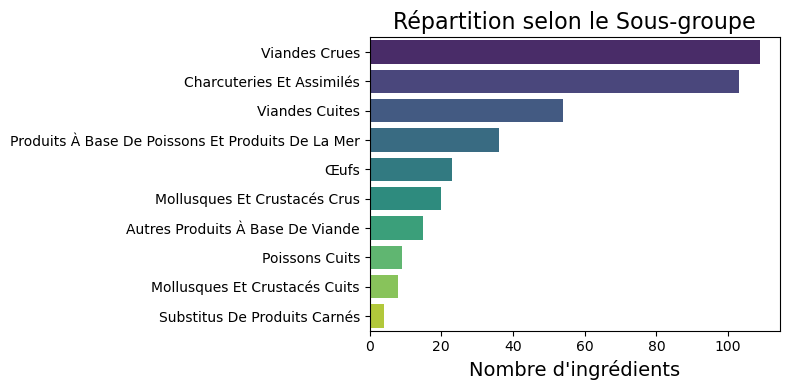

In [6]:
# Calcul des fréquences 
df_groupe_viande = df_svm.loc[df_svm["Groupe"] == "Viandes, Œufs, Poissons Et Assimilés",:]
frequence = df_groupe_viande['Sous-groupe'].value_counts()

# Barplot en utilisant seaborn
plt.figure(figsize=(8,4))
sns.barplot(x=frequence.values, y=frequence.index, palette='viridis',hue=frequence.index, legend = False)

# Labels et titre
plt.title("Répartition selon le Sous-groupe", fontsize=16)
plt.xlabel("Nombre d'ingrédients", fontsize=14)
plt.ylabel("", fontsize=14)

# Afficher le plot
plt.tight_layout()
plt.show()

**Distribution des variables *Calories* et *Protéines* selon le Groupe :**
- Les viandes, œufs et poissons ont plus de protéines 
- Les produits sucrés ont plus de calories
- Les fruits et légumes sont peu caloriques

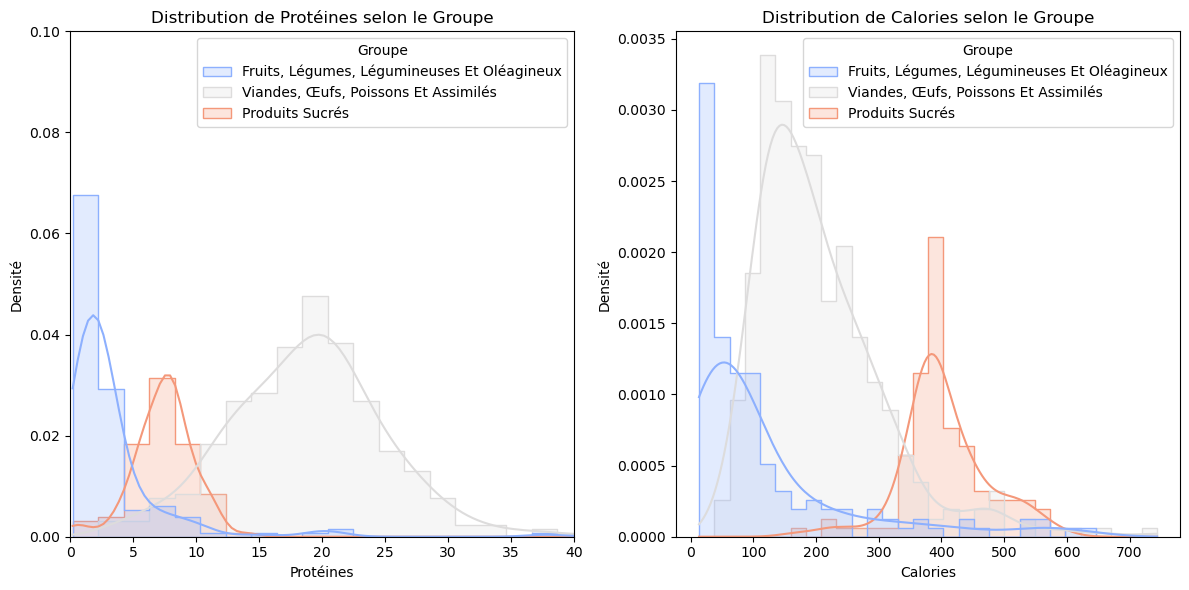

In [7]:
plt.figure(figsize=(12, 6))
df_viande_fruits_sucrés = df_svm[df_svm['Groupe'].isin(['Fruits, Légumes, Légumineuses Et Oléagineux','Viandes, Œufs, Poissons Et Assimilés','Produits Sucrés'])]

# Protéines
plt.subplot(1, 2, 1)
sns.histplot(data=df_viande_fruits_sucrés, x='Protéines', hue='Groupe', kde=True, element='step', palette='coolwarm', stat='density', bins=40)
plt.title("Distribution de Protéines selon le Groupe")
plt.ylabel("Densité")
plt.xlim(0,40)
plt.ylim(0,0.1)

# Calories
plt.subplot(1, 2, 2)
sns.histplot(data=df_viande_fruits_sucrés, x='Calories', hue='Groupe', kde=True, element='step', palette='coolwarm', stat='density', bins=30)
plt.title("Distribution de Calories selon le Groupe")
plt.ylabel("Densité")
plt.xlim()
plt.ylim()

# Afficher le plot
plt.tight_layout()
plt.show()

**Distribution de la variable *Glucides* selon le groupe :**

Les produits céréaliers et les produits sucrés ont plus de glucides

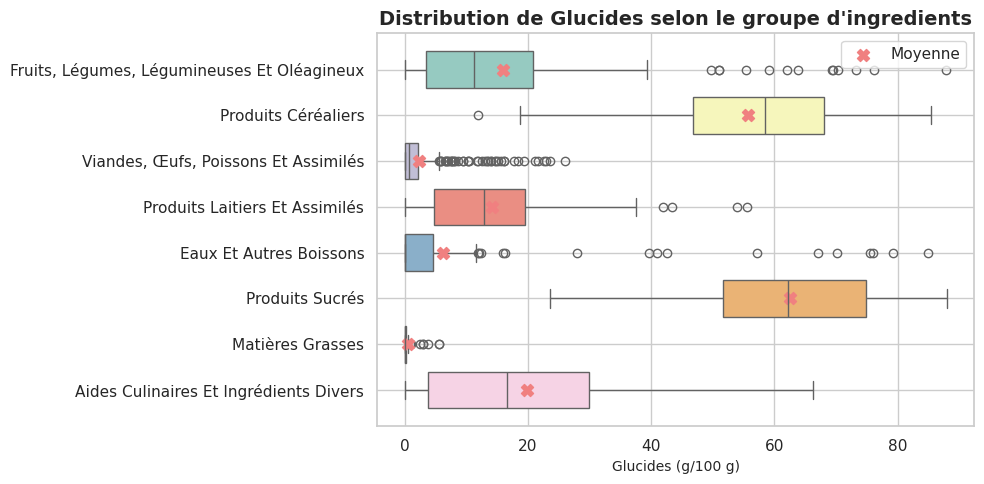

In [8]:
# Création du graphique 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))  

# Boxplot
ax = sns.boxplot(y='Groupe', x='Glucides', data=df_svm, palette="Set3", hue = 'Groupe', legend = False)

# Calculer les moyennes par catégorie
mean_values = df_svm.groupby('Groupe')['Glucides'].mean().reset_index()

# Ajouter des croix pour les moyennes
ax.scatter(mean_values['Glucides'], mean_values['Groupe'], color='lightcoral', marker='X', s=75, label='Moyenne', zorder = 2)

# Ajout des étiquettes et du titre
plt.title("Distribution de Glucides selon le groupe d'ingredients", fontsize=14,fontweight='bold')
plt.xlabel('Glucides (g/100 g)', fontsize=10)
plt.ylabel('')

# Afficher le graphique
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scraping Marmiton

In [1]:
# Imports
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Création d'un fichier csv

with open('Recette.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Recettes','Ingredients', 'Quantites','Notes','Commentaires','Personnes','Temps','Difficulte','Prix'])
    for k in range(2,8):
        url = 'https://www.marmiton.org/recettes/index/categorie/plat-principal/'+str(k)
        response = requests.get(url) # Effectuer la requête HTTP
        soup = BeautifulSoup(response.content, 'html.parser') # Parser le contenu HTML de la page
        liens = soup.findAll("div",{"class" : "mrtn-card__title"})
        recettes = [lien.text.strip() for lien in liens]
        for j in range(len(liens)):
            url = liens[j].find('a')['href']
            response = requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser')
            ingr_quant = soup.findAll("span",{"class": "card-ingredient-title"})
            ingredients = [i.find("span", {"class":"ingredient-name"}) for i in ingr_quant]
            quantites = []
            for i in ingr_quant:
                quantite = i.find("span", {"class":"count"})
                if quantite.text.strip():
                    quantites += [quantite.text.strip()]
                else:
                    quantites += ['0']
            notes = soup.find("span",{"class":"recipe-header__rating-text"})
            commentaires = soup.find("div",{"class":"recipe-header__comment"})
            personnes = soup.find("div",{"class":"mrtn-recette_ingredients-counter"})
            temps = soup.findAll("div",{"class":"recipe-primary__item"})
            for i in range(len(ingredients)):
                writer.writerow([recettes[j],ingredients[i].text.strip(),quantites[i],notes.text.strip(),int(commentaires.text.strip().split()[0]),personnes.get("data-servingsnb"),temps[0].text.strip(),temps[1].text.strip(),temps[2].text.strip()])


In [62]:
# Lecture des données

marmiton = pd.read_csv("Recette.csv")

# Composition des recettes
composition = marmiton.loc[:,['Recettes', 'Ingredients', 'Quantites']]
print(composition.head())

# Propriétés des recettes + Nombre d'ingrédients
recette = marmiton.drop(columns=['Ingredients','Quantites'])
col = recette.columns.tolist()
recette['Nombre_ingr'] = recette.groupby(col).transform('size')
recette = recette.drop_duplicates(subset = col)

# Notes et Temps en numérique
recette['Notes'] = recette['Notes'].str.split('/').str[0].astype(float)

def minute(x):
    if str(x) == 'nan':
        return -1
    l = str(x).split('h')
    if len(l) == 1:
        if l[0].strip() == '':
            l[0] = '0'
        return int(l[0].split('min')[0])
    for i in range(2):
        if l[i].strip() == '':
            l[i] = '0'
    return 60*int(l[0])+int(l[1])

recette['Minutes'] = recette['Temps'].apply(minute)

# Moyenne et difficile / moyen et assez cher

recette['Difficulte'] = recette['Difficulte'].replace({'moyenne': 'difficile'})
recette['Prix'] = recette['Prix'].replace({'moyen': 'assez cher'})

print(recette.head())

           Recettes Ingredients  Quantites
0  Poulet basquaise      poivre        0.0
1  Poulet basquaise         sel        0.0
2  Poulet basquaise     oignons        3.0
3  Poulet basquaise     poivron      700.0
4  Poulet basquaise      tomate        1.0
                                             Recettes  Notes  Commentaires  \
0                                    Poulet basquaise    4.7           702   
10        Blanquette de veau : recette traditionnelle    4.9          2920   
23  Filet mignon de porc rôti à la moutarde à l'an...    4.6            36   
32                         Lapin à la moutarde maison    4.8           484   
46                               Rôti de veau au four    4.7            72   

    Personnes Temps   Difficulte        Prix  Nombre_ingr  Minutes  
0           6  1h20       facile  assez cher         10.0       80  
10          4  2h15  très facile  assez cher         13.0      135  
23          6  1h40       facile  assez cher          9.0      100

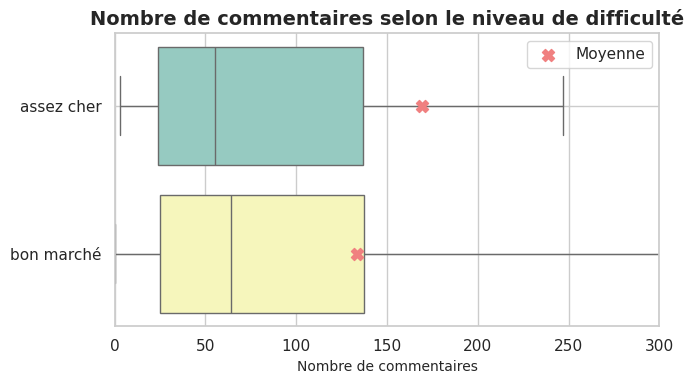

Prix
bon marché    118
assez cher     62
Name: count, dtype: int64


In [66]:
# Création du graphique : Commentaires selon Difficulte, les recettes très faciles semble susciter légèrment plus de commentaires
sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))  

# Boxplot
ax = sns.boxplot(y='Prix', x='Commentaires', data=recette, palette="Set3", hue = 'Prix', legend = False)

# Calculer les moyennes par catégorie
mean_values = recette.groupby('Prix')['Commentaires'].mean().reset_index()

# Ajouter des croix pour les moyennes
ax.scatter(mean_values['Commentaires'], mean_values['Prix'], color='lightcoral', marker='X', s=75, label='Moyenne', zorder = 2)

# Ajout des étiquettes et du titre
plt.title("Nombre de commentaires selon le niveau de difficulté", fontsize=14,fontweight='bold')
plt.xlabel('Nombre de commentaires', fontsize=10)
plt.ylabel('')

# Afficher le graphique
plt.xlim(0,300)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(recette['Prix'].value_counts())

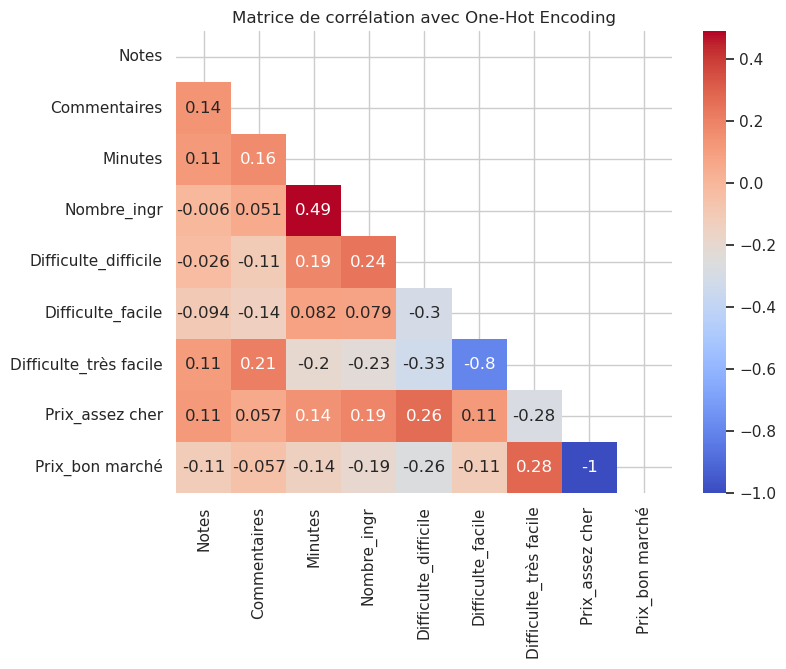

In [67]:
# Corrélations entre les variables :
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Créer le data.frame df
df = recette.loc[
    :,
    [
        "Notes",
        "Commentaires",
        "Minutes",
        "Nombre_ingr",
        "Difficulte",
        "Prix"
    ],
]
df_encoded = pd.get_dummies(df, columns=['Difficulte','Prix'])
corr = df_encoded.corr(method='pearson')
mask = np.zeros_like(corr,dtype = np.bool_)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm",mask=mask)
plt.title("Matrice de corrélation avec One-Hot Encoding")
plt.show()

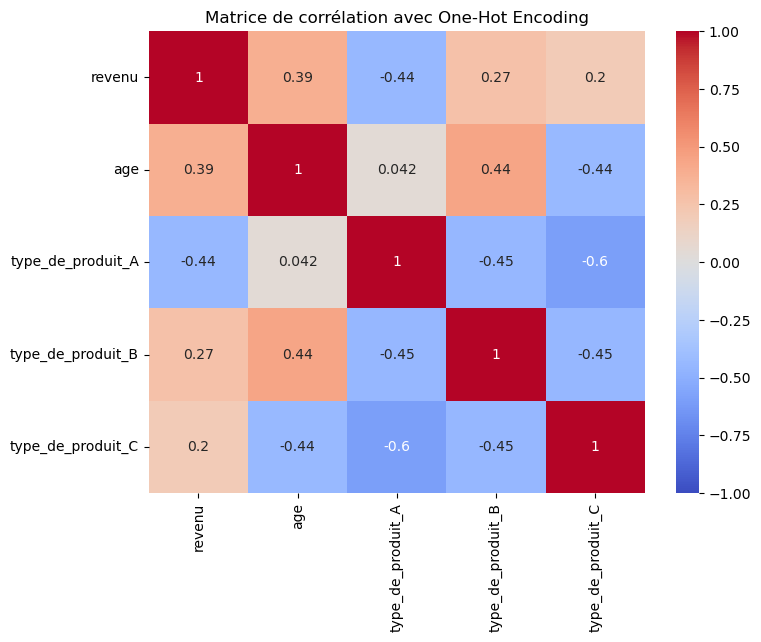

In [44]:
# Exemple avec plusieurs catégories
df = pd.DataFrame({
    'revenu': [2000, 2500, 3000, 3500, 4500, 5000, 1500, 1200],
    'type_de_produit': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C'],
    'age': [23, 35, 45, 23, 50, 38, 40, 30]
})

# One-Hot Encoding pour la variable 'type_de_produit'
df_encoded = pd.get_dummies(df, columns=['type_de_produit'])

# Calculer les corrélations
corr_matrix = df_encoded.corr()

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation avec One-Hot Encoding")
plt.show()